yolo发表于2015年，其历史贡献是提出one-stage检测框架，将定位与分类合并成一个流程，虽然精度低于fast-RCNN，但实时性较好。yolo的缺点是每个grid只输出两个框，难以检测成群的小物体；优点是FP较少，不容易将背景预测为物体，此外泛化能力强（作者用自然图像训练，然后在艺术作品数据集上进行测试，达到了优于其它模型的效果。虽然自然图像与艺术作品在颜色与纹理上相去甚远，但在尺寸、长宽比上较接近）

yolo的整体检测流程如下，整体框架如下图2所示。原始图像经过reisze后输入网络，最后输出SxSx(Bx5 + cls_num)的张量。其中，S为网格数量，B为每个网络预测的检测框数量，cls_num为类别数，文中设S为7，B为2，5为4个坐标（center_x, center_y, w, h, 其中center_x是在一个网格中的相对偏移，w,h为相对整幅图像的宽高）加一个是否有物体的概率，然后解码成预测框，最后用NMS去除冗余框。
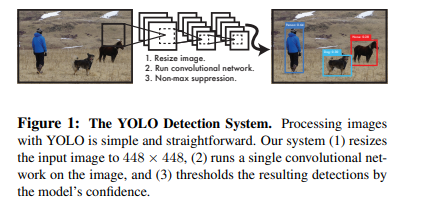

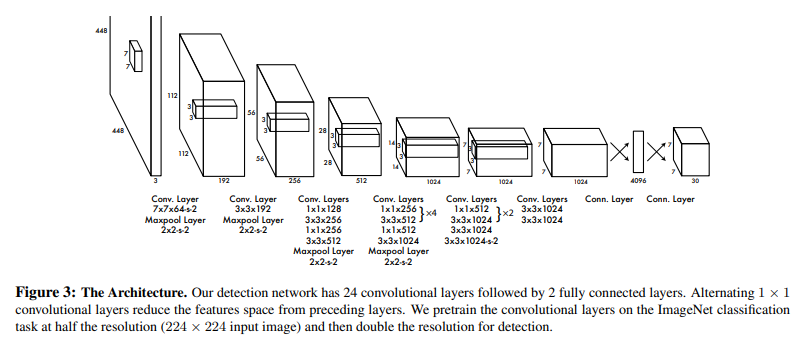

训练过程如下：用BP算法进行训练，loss函数如下：
$$
\lambda_{coord}\sum_{i=0}^{S^2}{\sum_{j=0}^{B}{\pmb{1_{ij}^{obj}}[(x_i - \hat x_i)^2 + (y_i - \hat y_i)^2]}} \\+ \lambda_{coord}\sum_{i=0}^{S^2}{\sum_{j=0}^{B}{\pmb{1_{ij}^{obj}}[(\sqrt{w_i} - \sqrt{\hat w_i})^2 + (\sqrt{h_i} - \sqrt{\hat h_i})^2]}} \\+ \sum_{i=0}^{S^2}{\sum_{j=0}^{B}{\pmb{1_{ij}^{obj}}(C_i - \hat C_i)^2}} \\+ \lambda_{noobj} \sum_{i=0}^{S^2}{\sum_{j=0}^{B}{\pmb{1_{ij}^{noobj}}(C_i - \hat C_i)^2}} \\+ \sum_{i=0}^{S^2}{\pmb{1_{i}^{obj}}\sum_{c \in classes}{(p_i(c) - \hat p_i(c))^2}}
$$
$其中，$